# Lab 5 - Classification : Naive Bayes and Logistic Regression

# Optical recognition of handwritten digits dataset
**Download dataset from sklearn. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1.**

# Using sklearn (25 points)

**For this exercise, you will use the naive bayes and logistic regression functions in sklearn. Use the optical recognition dataset.**


**a) Logistic Regression - use one vs all classification method to classify the dataset into one of the ten classes. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too). Tune parameters to obtain the best results.**

**b) Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with all the priors available (Gaussian, Bernoulli, etc) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).**

**Estimated Time: 50 mins**

 The images in the given dataset are as follows:


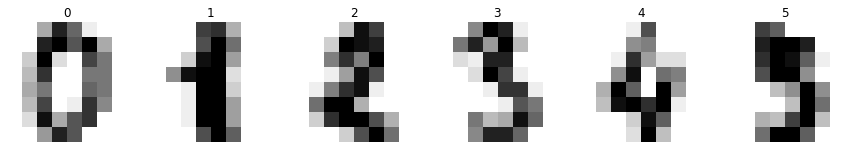

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# getting the dataset 
digits = load_digits()

# visualizing the images in the dataset (from image key)
print(" The images in the given dataset are as follows:")
plt.figure(figsize = (15,15))
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:6]):
    plt.subplot(1, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('%i' % label)

In [2]:
# splitting the dataset as train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size = 0.20, random_state = 1)
print('The dimension of the original dataset is', digits.data.shape)
print("The dimension of the training data is: ", X_train.shape)
print("The dimension of the test data is: ", X_test.shape)

The dimension of the original dataset is (1797, 64)
The dimension of the training data is:  (1437, 64)
The dimension of the test data is:  (360, 64)


# LOGISTIC REGRESSION

In [3]:
# Logistic Regression without tuning
logreg = LogisticRegression()
log_fit = logreg.fit(X_train,Y_train)

y_pred = log_fit.predict(X_test)

print("F1-Score computed is: \n %s\n"
      % (metrics.f1_score(Y_test, y_pred, average='micro')))

print("Confusion matrix:\n%s\n" % metrics.confusion_matrix(Y_test, y_pred))

print("Classification report for logistic regression classifier \n%s\n"
      % (metrics.classification_report(Y_test, y_pred)))

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(Y_test != y_pred).sum()))

F1-Score computed is: 
 0.9694444444444444

Confusion matrix:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  1  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  1  0  0 27  1]
 [ 0  0  0  0  0  1  0  0  1 32]]

Classification report for logistic regression classifier 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.97      0.99        35
           2       1.00      0.97      0.99        36
           3       0.95      0.95      0.95        41
           4       0.97      1.00      0.99        38
           5       0.94      0.97      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.90      0.93      0.92        29
       

In [4]:
# using GridSearchCV to tune the logistic regression Model
rng = np.linspace(0.01,0.1,50)
parameters = {'C': rng}
reg = LogisticRegression()
clf = GridSearchCV(reg, parameters, cv = 5)
clf.fit(X_train, Y_train)
print("The optimal C value is: ", clf.best_params_['C'])

The optimal C value is:  0.015510204081632653


In [5]:
# Building the Logistic Regression Model with the optimal parameters
logreg = LogisticRegression(C = clf.best_params_['C'])
log_fit = logreg.fit(X_train,Y_train)

y_pred = log_fit.predict(X_test)

print("F1-Score computed is: \n %s\n"
      % (metrics.f1_score(Y_test, y_pred, average='micro')))

print("Confusion matrix:\n%s\n" % metrics.confusion_matrix(Y_test, y_pred))

print("Classification report for logistic regression classifier \n%s\n"
      % (metrics.classification_report(Y_test, y_pred)))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(Y_test != y_pred).sum()))

F1-Score computed is: 
 0.975

Confusion matrix:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 33  0  0  1  0  1  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  1  0  0 27  1]
 [ 0  0  0  0  0  1  0  0  1 32]]

Classification report for logistic regression classifier 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.94      0.97        35
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       0.95      1.00      0.97        38
           5       0.91      1.00      0.95        30
           6       0.97      1.00      0.99        37
           7       1.00      0.97      0.99        37
           8       0.96      0.93      0.95        29
           9       0

 The images in the test dataset and their predictions are as follows:


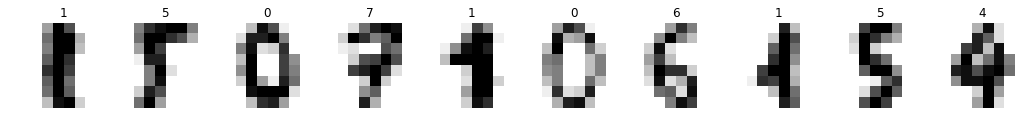

In [6]:
# Visualizing test dataset along with the predictions of Logistic Regression Classifier
test_images = [X_test[i].reshape(8,8) for i in range(len(X_test))]
images_and_predictions = list(zip(test_images, y_pred))
print(" The images in the test dataset and their predictions are as follows:")
plt.figure(figsize = (18,18))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('%i' % prediction)

plt.show()

### Observation:
- Logistic Regression performs fairly well on the given dataset with a tuned (after tuning the regularization parameter (C))  f1 score of 0.975 with a miss classification error of 9 out of 360 images in the test dataset.
- The classification report is also printed to get the info about all the classes present (0 to 9) 

# NAIVE BAYES CLASSIFICATION 

In [7]:
# using gaussian prior
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d\n" % (X_test.shape[0],(Y_test != y_pred).sum()))

print("F1-Score computed using Gaussian prior is: \n %s\n"
      % (metrics.f1_score(Y_test, y_pred, average='micro')))

print("Confusion matrix:\n%s\n" % metrics.confusion_matrix(Y_test, y_pred))


Number of mislabeled points out of a total 360 points : 53

F1-Score computed using Gaussian prior is: 
 0.8527777777777777

Confusion matrix:
[[41  0  0  0  1  0  0  1  0  0]
 [ 0 29  0  0  0  0  0  0  6  0]
 [ 0  3 23  1  0  0  0  0  9  0]
 [ 0  1  1 32  0  2  0  2  3  0]
 [ 1  0  0  0 35  0  1  0  1  0]
 [ 0  1  0  0  0 25  0  2  2  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  1  0  0  0  0 28  0]
 [ 0  1  0  1  2  1  0  5  4 20]]



In [12]:
# using Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
multiNB = MultinomialNB()
y_pred = multiNB.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d\n" % (X_test.shape[0],(Y_test != y_pred).sum()))

print("F1-Score computed using Multinomial Naive Bayes is: \n %s\n"
      % (metrics.f1_score(Y_test, y_pred, average='micro')))

print("Confusion matrix:\n%s\n" % metrics.confusion_matrix(Y_test, y_pred))

Number of mislabeled points out of a total 360 points : 33

F1-Score computed using Multinomial Naive Bayes is: 
 0.9083333333333333

Confusion matrix:
[[41  0  0  0  2  0  0  0  0  0]
 [ 0 24  5  0  0  0  1  0  3  2]
 [ 0  1 31  0  0  0  0  0  2  2]
 [ 0  0  0 34  0  0  0  1  3  3]
 [ 1  0  0  0 36  0  0  1  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  1  0]
 [ 0  0  0  0  0  0  0  0 28  1]
 [ 0  0  0  0  0  0  0  3  0 31]]



In [13]:
# using Bernoulli prior
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d\n" % (X_test.shape[0],(Y_test != y_pred).sum()))

print("F1-Score computed using Bernoulli prior is: \n %s\n"
      % (metrics.f1_score(Y_test, y_pred, average='micro')))

print("Confusion matrix:\n%s\n" % metrics.confusion_matrix(Y_test, y_pred))


Number of mislabeled points out of a total 360 points : 47

F1-Score computed using Bernoulli prior is: 
 0.8694444444444445

Confusion matrix:
[[42  1  0  0  0  0  0  0  0  0]
 [ 0 20  7  0  0  0  0  0  6  2]
 [ 0  1 31  2  0  0  0  1  1  0]
 [ 0  0  1 33  0  0  0  1  2  4]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  1  0  0  0 27  0  0  1  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  1  0  0 35  1  0]
 [ 0  0  0  0  0  1  0  0 25  3]
 [ 0  2  0  2  0  1  0  3  0 26]]



### Observation
- The MultinomialNB gives the best f1 score of 0.90833 as against GaussianNB(0.85277) and BernoulliNB(0.86944). So, Multinomial Prior is the best prior.
- The accuracies are reported in terms of F1 score and Confusion Matrix in all the three cases.

# The End